# process 
- Text analysis  50%
- Text Transformation 40%
- Model development 5%
- ui application 5%

# text analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# plt.style.available    --- use to see available themes
plt.style.use('ggplot')

In [13]:
sns.set_style('whitegrid')

In [14]:
import nltk

In [15]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\stormlightx\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\stormlightx\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\stormlightx\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\stormlightx\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\stormlightx\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[

True

In [22]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import spacy

In [25]:
spacy.load('en_core_web_sm')

In [29]:
messages = pd.read_csv('dataset/spam.csv', encoding='latin1')

In [30]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
messages.drop(labels= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [33]:
messages.columns=['category','text']
messages.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
category    5572 non-null object
text        5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [35]:
messages.category.value_counts()

ham     4825
spam     747
Name: category, dtype: int64

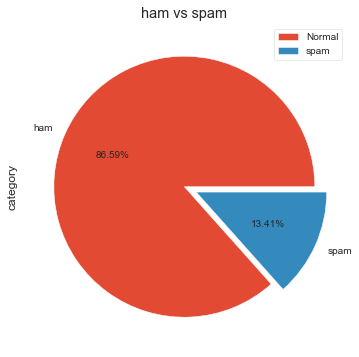

In [37]:
messages.category.value_counts().plot(kind='pie',explode=[0,.1],figsize=(6,6),autopct='%.2f%%')
plt.title("ham vs spam")
plt.legend(['Normal',"spam"])
plt.show()

In [46]:
messages.groupby('text')['category'].agg([len,np.max]).sort_values(by='len',ascending=False).head(10)

,len,amax
text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


individual spam/ham words

In [76]:
spam_messages = messages[messages['category']=='spam']['text']
ham_messages = messages[messages['category']=='ham']['text']

In [77]:
spam_words= []
ham_words= []

In [78]:
def extract_spam_words(text):
    global spam_words
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    spam_words.extend(words)

def extract_ham_words(text):
    global ham_words
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    ham_words.extend(words)


In [79]:
# for word in word_tokenize("i just keep yapping, while my students sleep"):
#     if word.lower() not in stopwords.words('english'):
#         print(word)

In [80]:
spam_messages.apply(extract_spam_words)

2       None
5       None
8       None
9       None
11      None
        ... 
5537    None
5540    None
5547    None
5566    None
5567    None
Name: text, Length: 747, dtype: object

In [81]:
ham_messages.apply(extract_ham_words)
print(ham_words)

ne', 'come', 'get', 'b', 'quite', 'diff', 'guess', 'rite', 'reach', 'ur', 'home', 'lt', 'gt', 'minutes', 'babe', 'answering', 'ca', 'see', 'maybe', 'better', 'reboot', 'ym', 'got', 'photo', 'great', 'think', 'match', 'know', 'thinkin', 'malaria', 'relax', 'children', 'cant', 'handle', 'malaria', 'would', 'worse', 'gastroenteritis', 'takes', 'enough', 'replace', 'loss', 'temp', 'reduce', 'give', 'malaria', 'meds', 'vomit', 'self', 'limiting', 'illness', 'means', 'days', 'completely', 'stop', 'dai', 'downloaded', 'exe', 'file', 'run', 'exe', 'installing', 'yesterday', 'true', 'true', 'business', 'pa', 'selected', 'keep', 'ten', 'rs', 'shelf', 'buy', 'two', 'egg', 'late', 'well', 'thats', 'nice', 'bad', 'cant', 'eat', 'accidentally', 'brought', 'em', 'home', 'box', 'pls', 'needs', 'dat', 'slowly', 'vomit', 'take', 'exam', 'march', 'jane', 'babes', 'goin', 'wrk', 'feel', 'ill', 'lst', 'nite', 'foned', 'already', 'cover', 'chuck', 'nights', 'nt', 'staying', 'port', 'step', 'liao', 'ex', 'di

In [82]:
from wordcloud import WordCloud

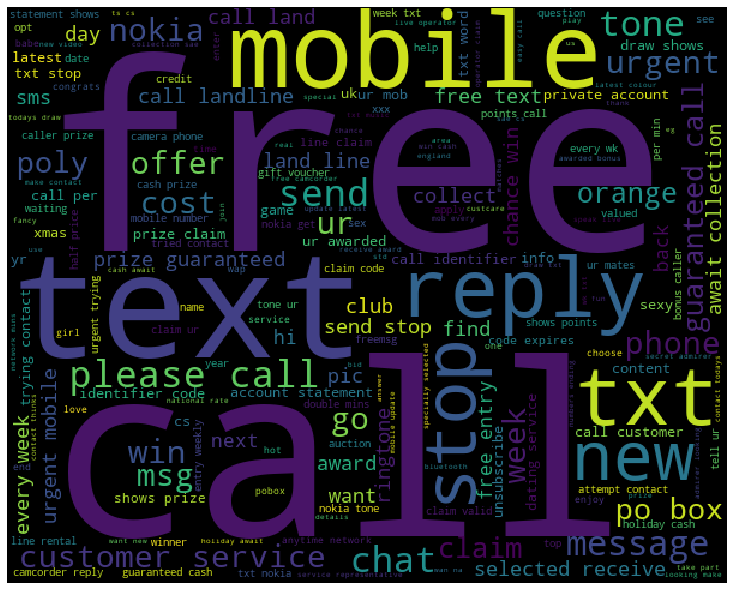

In [83]:
spam_wordcloud = WordCloud(width=600,height=480).generate(" ".join(spam_words))
plt.figure(figsize=(10,8))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

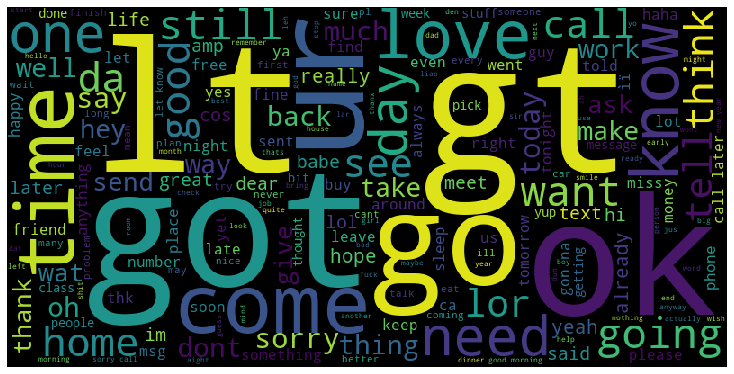

In [84]:
ham_wordcloud = WordCloud(width=800,height=400).generate(" ".join(ham_words))
plt.figure(figsize=(10,8))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [85]:
spam_words = np.array(spam_words)
pd.Series(spam_words).value_counts().head(10)

call      346
free      217
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [86]:
ham_words = np.array(ham_words)
pd.Series(ham_words).value_counts().head(10)

u       974
gt      318
lt      316
get     301
ok      246
go      246
got     242
ur      237
know    234
like    231
dtype: int64

In [87]:
messages['messageLength'] = messages['text'].apply(len)
messages.head()

,category,text,messageLength
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


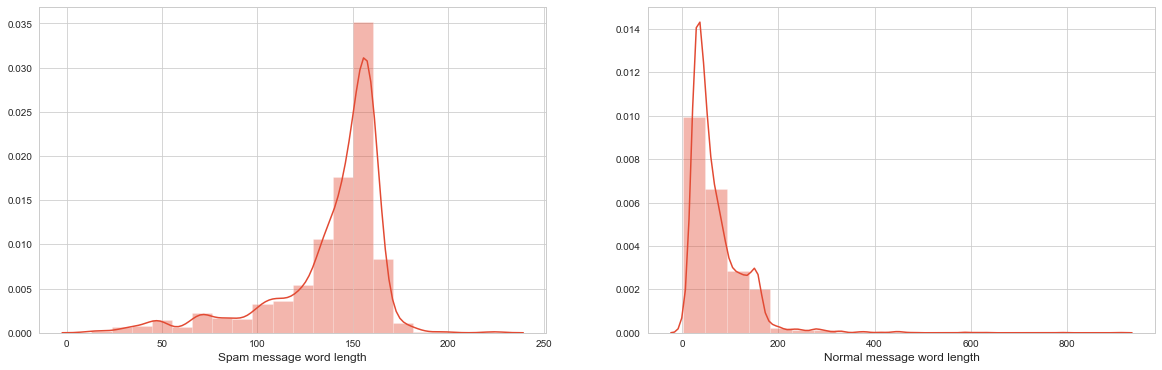

In [89]:
f, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(messages[messages['category']=='spam']['messageLength'], bins = 20, ax= ax[0])
ax[0].set_xlabel('Spam message word length')
sns.distplot(messages[messages['category']=='ham']['messageLength'], bins = 20, ax= ax[1])
ax[1].set_xlabel('Normal message word length')
plt.show()


# Text Transformation

clean punctuations & stopwords & stemming
- stemming example
    - playing
    - plays
    - *play* - this will be called a stem word also called 'lemma'
    - playable 
    - playthrough

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
def cleanupText(message):
    message =  message.translate(str.maketrans('','',string.punctuation)) # remove basic puncutation
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words('english')]
    return " ".join(words)

In [ ]:
messages.text = messages.text.apply(cleanupText)

In [ ]:
messages.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer(encoding='latin1',strip_accents='unicode',stop_words="english")
features = vec.fit_transform(messages.text)
features.shape

# model application

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
category_enc = LabelEncoder()
messages.category = category_enc.fit_transform(messages.category)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, messages.category, test_size=.2)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(xtrain,ytrain)
ypred =  clf.predict(xtest)

In [ ]:
fbeta_score(ytest,ypred,beta=.5)

In [ ]:
import pickle

In [ ]:
def save_model(model, path="models/clf.pk"):
    with open(path,'wb') as file:
        pickle.dump(model, file)
    print("success")

In [ ]:
save_model(clf)